In [65]:
import os
import pandas as pd
import pickle
import re
from nltk import FreqDist
import matplotlib.pyplot as plt



In [66]:
all_pubs = pd.DataFrame()

for filename in os.listdir('./scopus_exports'):
    df = pd.read_csv('./scopus_exports/'+filename)
    all_pubs = pd.concat([all_pubs,df])


    
    

In [14]:
with open('all_publications.pickle', 'wb') as handle:
    pickle.dump(all_pubs, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [67]:
all_pubs.reset_index(drop=True,inplace=True)

In [68]:
all_pubs['Abstract'][0]

'As distributed generators (DGs) rapidly integrate into current power systems, new methods to effectively manage them need to be developed. Toward this end, a large number of geographically dispersed DGs are generally aggregated into a virtual power plant (VPP). Then, distributed control schemes are used to achieve optimal economic dispatch of the VPP by maintaining equal incremental costs of DGs while the aggregated DG power matches the dispatch command. Often, one of the drawbacks of distributed schemes is that they are susceptible to communication failures and cyber-attacks (i.e., non-colluding and colluding attacks). In order to mitigate this problem, an attack-robust distributed economic dispatch strategy is proposed where we assume that every DG can monitor the behavior of its in-neighbors and has the network connectivity information. The proposed strategy detects the mis-behaving DGs residing in the network and gradually isolates them so that the remaining well-behaving DGs coul

In [72]:
# get list of all cyber occurrences 

pattern = re.compile(r'(?<!www\.)\w*cyber-{0,1} {0,1}\w*\b')

matches = []
   
for counter,abstract in enumerate(all_pubs.Abstract): # iterate through that year's abstracts
        
    abstract = abstract.lower()
    match = pattern.findall(abstract) # extract cyber words
    matches.append(match)
    if counter % 10000 == 0 and counter != 0:
        print(str(counter)+' abstracts processed')

matches = [word for sublist in matches for word in sublist] # flatten list
for c,match in enumerate(matches):
    match = match.replace("-", "")
    match = match.replace(" ", "")
    matches[c] = match


10000 abstracts processed
20000 abstracts processed
30000 abstracts processed
40000 abstracts processed
50000 abstracts processed
60000 abstracts processed
70000 abstracts processed
80000 abstracts processed
90000 abstracts processed
100000 abstracts processed
110000 abstracts processed


In [82]:
# get top 10 words

fd = FreqDist(matches)
top_ten = fd.most_common(10)
kws = []
for i in top_ten:
    kws.append(i[0])

['cybersecurity',
 'cyberphysical',
 'cyberspace',
 'cyberbullying',
 'cyberattacks',
 'cybernetics',
 'cybernetic',
 'cyberknife',
 'cybercrime',
 'cyberattack']

In [84]:
# get word counts per year

years = set(all_pubs.Year)

yearly_match_dict = {}

for year in years:
    print('Processing year %s' %year)
    yearly_matches = []
    yearly_pubs = all_pubs[all_pubs['Year'] == year]
    for abstract in yearly_pubs.Abstract:
        abstract = abstract.lower()
        match = pattern.findall(abstract) # extract cyber words
        yearly_matches.append(match)
    yearly_matches = [word for sublist in yearly_matches for word in sublist]
    yearly_match_dict[year] = yearly_matches

Processing year 1948
Processing year 1949
Processing year 1950
Processing year 1951
Processing year 1952
Processing year 1953
Processing year 1954
Processing year 1955
Processing year 1956
Processing year 1957
Processing year 1958
Processing year 1959
Processing year 1960
Processing year 1961
Processing year 1962
Processing year 1963
Processing year 1964
Processing year 1965
Processing year 1966
Processing year 1967
Processing year 1968
Processing year 1969
Processing year 1970
Processing year 1971
Processing year 1972
Processing year 1973
Processing year 1974
Processing year 1975
Processing year 1976
Processing year 1977
Processing year 1978
Processing year 1979
Processing year 1980
Processing year 1981
Processing year 1982
Processing year 1983
Processing year 1984
Processing year 1985
Processing year 1986
Processing year 1987
Processing year 1988
Processing year 1989
Processing year 1990
Processing year 1991
Processing year 1992
Processing year 1993
Processing year 1994
Processing ye

In [90]:
a = {}

for year in list(range(1990,2000)):#yearly_match_dict.keys()
    cleaned_matches = [word.replace("-", "").replace(' ','') for word in yearly_match_dict[year]]
    filtered_matches = [word for word in cleaned_matches if word in kws]
    counts = FreqDist(filtered_matches)
    a[year] = counts
a

{1990: FreqDist({'cybernetic': 43, 'cybernetics': 40, 'cyberspace': 2}),
 1991: FreqDist({'cybernetic': 54, 'cybernetics': 30, 'cyberspace': 2}),
 1992: FreqDist({'cybernetic': 30, 'cybernetics': 24, 'cyberspace': 3}),
 1993: FreqDist({'cybernetic': 24, 'cybernetics': 30, 'cyberspace': 12}),
 1994: FreqDist({'cybernetic': 37, 'cybernetics': 29, 'cyberspace': 21}),
 1995: FreqDist({'cybernetic': 39, 'cybernetics': 40, 'cyberspace': 58}),
 1996: FreqDist({'cybernetic': 39, 'cybernetics': 62, 'cyberspace': 111}),
 1997: FreqDist({'cyberattack': 1,
           'cyberknife': 3,
           'cybernetic': 76,
           'cybernetics': 53,
           'cyberspace': 126}),
 1998: FreqDist({'cyberattack': 1,
           'cyberattacks': 1,
           'cybercrime': 5,
           'cyberknife': 4,
           'cybernetic': 57,
           'cybernetics': 65,
           'cyberphysical': 1,
           'cyberspace': 136}),
 1999: FreqDist({'cyberattacks': 1,
           'cybercrime': 1,
           'cyberknife'

In [89]:
for i in 

['cybersecurity',
 'cyberphysical',
 'cyberspace',
 'cyberbullying',
 'cyberattacks',
 'cybernetics',
 'cybernetic',
 'cyberknife',
 'cybercrime',
 'cyberattack']

In [100]:
# make dictionary with years and list of all cyberwords for that year

match_dict =  {}

for year in set(all_pubs.Year):
    print(str(year))
    yearly_pubs = all_pubs[all_pubs['Year'] == year]
    matches = []

    for abstract in yearly_pubs.Abstract: # iterate through that year's abstracts

        abstract = abstract.lower()
        match = pattern.findall(abstract) # extract cyber words
        matches.append(match)

    matches = [word for sublist in matches for word in sublist] # flatten list
    for c,match in enumerate(matches):
        match = match.replace("-", "")
        match = match.replace(" ", "")
        matches[c] = match
    
    match_dict[year] = matches


1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018


In [104]:
# get yearly counts

final_dict = {}

for year in match_dict.keys():
    filtered_matches = [i for i in match_dict[year] if i in kws]
    fd = dict(FreqDist(filtered_matches))
    final_dict[year] = fd
    



In [110]:
final_df = pd.DataFrame(index=set(all_pubs.Year),columns=kws)
for year in final_df.index:
    print(year)
    for word in kws:
        try:
            final_df.loc[year,word] = final_dict[year][word]
        except KeyError:
            final_df.loc[year,word] = 0

1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018


In [111]:
final_df

,cybersecurity,cyberphysical,cyberspace,cyberbullying,cyberattacks,cybernetics,cybernetic,cyberknife,cybercrime,cyberattack
1948,0,0,0,0,0,0,0,0,0,0
1949,0,0,0,0,0,1,0,0,0,0
1950,0,0,0,0,0,0,1,0,0,0
1951,0,0,0,0,0,0,0,0,0,0
1952,0,0,0,0,0,1,0,0,0,0
1953,0,0,0,0,0,1,2,0,0,0
1954,0,0,0,0,0,1,0,0,0,0
1955,0,0,0,0,0,0,0,0,0,0
1956,0,0,0,0,0,0,0,0,0,0
1957,0,0,0,0,0,1,1,0,0,0


/Users/JACKLAVIOLETTE/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


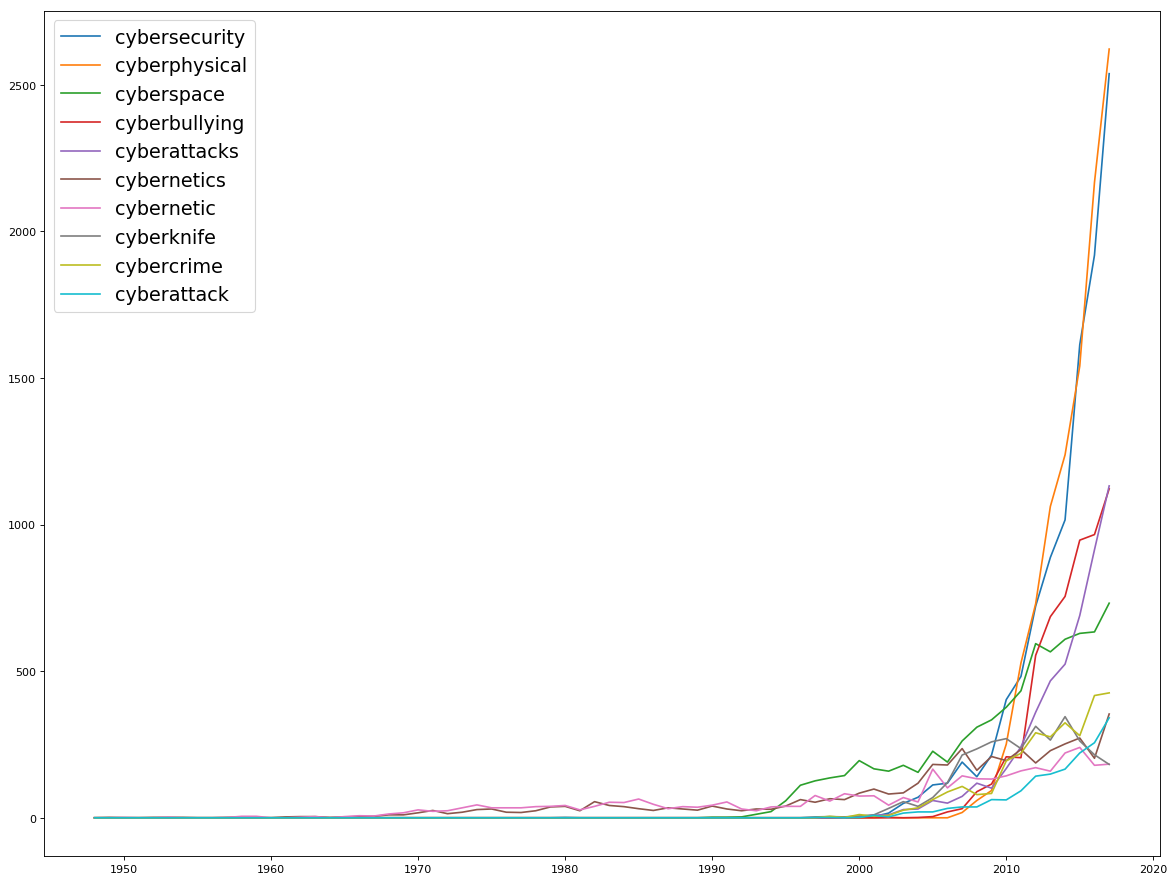

In [148]:
x = final_df.index[:-1]

fig=plt.figure(figsize=(18, 14), dpi= 80, facecolor='w', edgecolor='k')

for word in final_df.columns:
    y = [final_df[word][year] for year in x]
    plt.plot(x,y,label=word)
plt.legend(fontsize = 'xx-large')
fig.show()


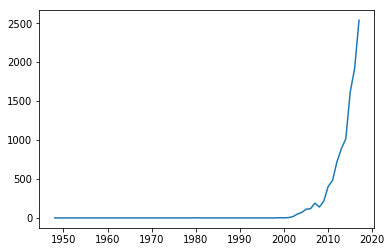

In [116]:
plt.plot(x,y)
plt.show()